# Random Forests Exercises

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

> ### Lesson Examples:

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

In [ ]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


# Train

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


In [ ]:
rf.fit(X_train, y_train)

In [ ]:
RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [ ]:
print(rf.feature_importances_)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
y_pred_proba = rf.predict_proba(X_train)

# Evaluate

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


In [ ]:
print(confusion_matrix(y_train, y_pred))


# Precision: $\frac{TP}{(TP + FP)}$

# Recall: $\frac{TP}{(TP + FN)}$

# F1: $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [ ]:
print(classification_report(y_train, y_pred))


# Validate

In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


# Random Forest Exercises

In [74]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import acquire
import prepare

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

# Acquire

In [ ]:
titanic = acquire.get_titanic_data()

# Prepare

In [ ]:
titanic = prepare.prep_titanic(titanic)

In [111]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [112]:
train_validate, test = train_test_split(titanic,train_size=.8,random_state=123)
#train, validate, test = prepare.split_dataset(titanic)
train, validate = train_test_split(titanic,train_size=.7,random_state=123,stratify=titanic.survived)

In [113]:
train.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        122
sibsp                        0
parch                        0
fare                         0
embark_town                  1
alone                        0
sex_male                     0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

# Divide: Train, Validate, Test

In [114]:
# I dropped columns outside of the prepare.py functions

X_train = train.drop(columns=['survived', 'sex', 'embark_town','age'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town','age'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived', 'sex', 'embark_town','age'])
y_test = test['survived']

In [115]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
199,2,0,0,13.000,1,0,0,1
468,3,0,0,7.725,1,1,1,0
198,3,0,0,7.750,1,0,1,0
574,3,0,0,8.050,1,1,0,1
776,3,0,0,7.750,1,1,1,0


In [116]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [117]:
# Base Class = Deaths
# y_train = survived

y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [118]:
# Mode = Most Frequent
# Mode(y_train('survived')) = 0 = 302 = Not Survived

base_line = y_train.mode()

In [119]:
base_line_accuracy = round((y_train == base_line[0]).mean(),2)
print(f'Base Line Accuracy: {base_line_accuracy}')

Base Line Accuracy: 0.62


In [120]:
seed=42
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10, random_state=seed,
                            max_samples=.5)

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [121]:
# "Fit object", which creates "Model"

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_samples=0.5, random_state=42)

In [139]:
y_pred = rf.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [140]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       384
           1       0.93      0.80      0.86       239

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623



In [123]:
rf.score(X_train, y_train)

0.898876404494382

In [124]:
confusion_matrix(y_train, y_pred)

array([[369,  15],
       [ 48, 191]])

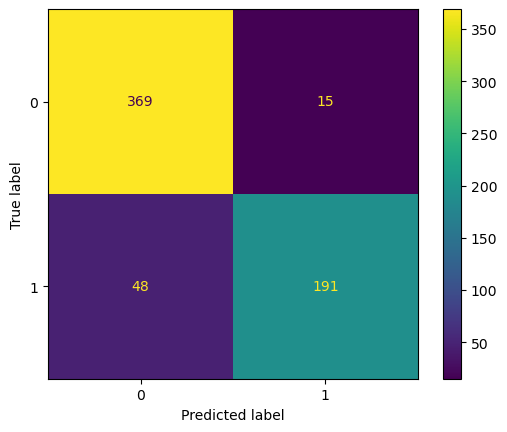

In [125]:
plot_confusion_matrix(rf, X_train, y_train)
plt.show()

In [126]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       384
           1       0.93      0.80      0.86       239

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623



In [127]:
report = classification_report(y_train, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

,0,1,accuracy,macro avg,weighted avg
precision,0.884892,0.927184,0.898876,0.906038,0.901117
recall,0.960938,0.799163,0.898876,0.880050,0.898876
f1-score,0.921348,0.858427,0.898876,0.889888,0.897210
support,384.000000,239.000000,0.898876,623.000000,623.000000


In [128]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.78


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
# Rate = mean
# True Positive Rate = (TP / ALL RESULTS)

In [129]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [130]:
rates_all = TP + FP + FN + TN
accuracy = (TP + TN)/rates_all
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = TP/(TP+(.5*(FP+FN)))

In [131]:
true_positive_rate = TP/rates_all
false_positive_rate = FP/rates_all
true_negative_rate = TN/rates_all
false_negative_rate = FN/rates_all

In [141]:
support_pos=TP+FN
support_neg=FP+TN

In [142]:
print(f'True Positive Rate: {true_positive_rate:.2f}')
print(f'False Positive Rate: {false_positive_rate:.2f}')
print(f'True Negative Rate: {true_negative_rate:.2f}')
print(f'False Negative Rate: {false_negative_rate:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 - Survived: {f1:.2f}')
print(f'Support(+): {support_pos:.2f}')
print(f'Support(-): {support_neg:.2f}')

True Positive Rate: 0.31
False Positive Rate: 0.02
True Negative Rate: 0.59
False Negative Rate: 0.08
Precision: 0.93
Recall: 0.80
F1 - Survived: 0.86
Support(+): 239.00
Support(-): 384.00


#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [133]:
for i in range(2,10):
    rf2 = RandomForestClassifier(min_samples_leaf=i,max_depth=(10-i), random_state=seed,
                            max_samples=.5)
    rf2.fit(X_train, y_train)
    
    train_accuracy = rf2.score(X_train, y_train)
    
    val_accuracy = rf2.score(X_validate,y_validate)
    
    print(f'Max Depth of: {10-i} & Minimum Sample Leaf of: {i}. Train Accuracy: {train_accuracy}. Validation Accuracy: {val_accuracy}.')
    print()
    print('-------------')
    print()

Max Depth of: 8 & Minimum Sample Leaf of: 2. Train Accuracy: 0.8587479935794543. Validation Accuracy: 0.7835820895522388.

-------------

Max Depth of: 7 & Minimum Sample Leaf of: 3. Train Accuracy: 0.8523274478330658. Validation Accuracy: 0.7798507462686567.

-------------

Max Depth of: 6 & Minimum Sample Leaf of: 4. Train Accuracy: 0.8298555377207063. Validation Accuracy: 0.7835820895522388.

-------------

Max Depth of: 5 & Minimum Sample Leaf of: 5. Train Accuracy: 0.8218298555377207. Validation Accuracy: 0.7910447761194029.

-------------

Max Depth of: 4 & Minimum Sample Leaf of: 6. Train Accuracy: 0.8234349919743178. Validation Accuracy: 0.8022388059701493.

-------------

Max Depth of: 3 & Minimum Sample Leaf of: 7. Train Accuracy: 0.8186195826645265. Validation Accuracy: 0.7873134328358209.

-------------

Max Depth of: 2 & Minimum Sample Leaf of: 8. Train Accuracy: 0.797752808988764. Validation Accuracy: 0.7686567164179104.

-------------

Max Depth of: 1 & Minimum Sample Le

#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [134]:
graph = []
for i in range(2,10):
    rf2 = RandomForestClassifier(min_samples_leaf=i,max_depth=(10-i), random_state=seed,
                            max_samples=.5)
    rf2.fit(X_train, y_train)
    train_accuracy = rf2.score(X_train, y_train)
    val_accuracy = rf2.score(X_validate,y_validate)
    
    output = {
        "max_depth": 10-i,
        "min_sample_leaf": i,
        "train_accuracy": train_accuracy,
        "val_accuracy": val_accuracy}
    
    graph.append(output)
    
df = pd.DataFrame(graph)
df["difference"] = df.train_accuracy - df.val_accuracy
df

,max_depth,min_sample_leaf,train_accuracy,val_accuracy,difference
0,8,2,0.858748,0.783582,0.075166
1,7,3,0.852327,0.779851,0.072477
2,6,4,0.829856,0.783582,0.046273
3,5,5,0.821830,0.791045,0.030785
4,4,6,0.823435,0.802239,0.021196
5,3,7,0.818620,0.787313,0.031306
6,2,8,0.797753,0.768657,0.029096
7,1,9,0.778491,0.768657,0.009834


In [137]:
df["difference"] = df.train_accuracy - df.val_accuracy
df.head(3)

,max_depth,min_sample_leaf,train_accuracy,val_accuracy,difference
0,8,2,0.858748,0.783582,0.075166
1,7,3,0.852327,0.779851,0.072477
2,6,4,0.829856,0.783582,0.046273


In [143]:
df

,max_depth,min_sample_leaf,train_accuracy,val_accuracy,difference
0,8,2,0.858748,0.783582,0.075166
1,7,3,0.852327,0.779851,0.072477
2,6,4,0.829856,0.783582,0.046273
3,5,5,0.821830,0.791045,0.030785
4,4,6,0.823435,0.802239,0.021196
5,3,7,0.818620,0.787313,0.031306
6,2,8,0.797753,0.768657,0.029096
7,1,9,0.778491,0.768657,0.009834


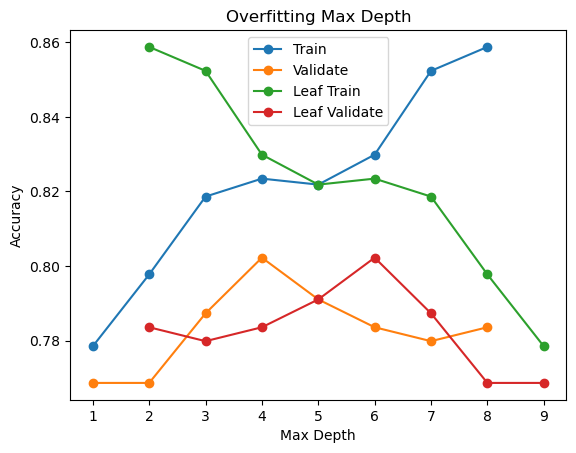

In [138]:
#plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.val_accuracy, marker = 'o', label = 'Validate')

plt.plot(df.min_sample_leaf, df.train_accuracy, marker = 'o', label = 'Leaf Train')
plt.plot(df.min_sample_leaf, df.val_accuracy, marker = 'o', label = 'Leaf Validate')

plt.title('Overfitting Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

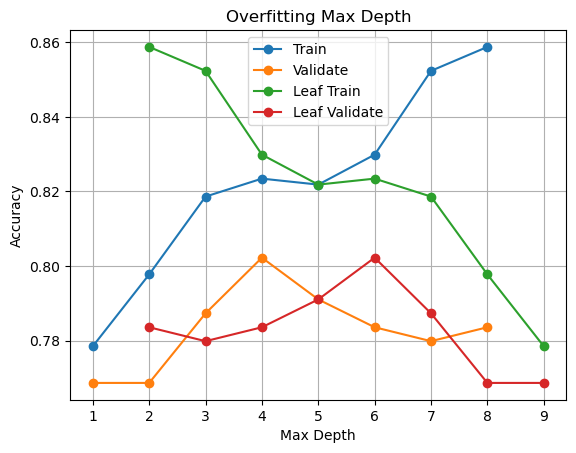

In [144]:
#plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.val_accuracy, marker = 'o', label = 'Validate')

plt.plot(df.min_sample_leaf, df.train_accuracy, marker = 'o', label = 'Leaf Train')
plt.plot(df.min_sample_leaf, df.val_accuracy, marker = 'o', label = 'Leaf Validate')

plt.title('Overfitting Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [ ]:
# Nested For Loop Version
# Try more than Max Depth = 10
# Test against Leaf Size 1 to Max

In [104]:
#Validate Accuracy Difference Sorted

df[df.difference <= 0.10].sort_values(by=['val_accuracy', 'difference'], ascending = [False,True])

,max_depth,min_sample_leaf,train_accuracy,val_accuracy,difference
3,5,5,0.815261,0.822430,-0.007169
4,4,6,0.811245,0.813084,-0.001839
2,6,4,0.825301,0.813084,0.012217
1,7,3,0.843373,0.813084,0.030289
0,8,2,0.863454,0.799065,0.064388
5,3,7,0.793173,0.794393,-0.001220
6,2,8,0.791165,0.780374,0.010791
7,1,9,0.748996,0.757009,-0.008013


In [ ]:
z